In [ ]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.linear_model
import ast
import matplotlib.pyplot as plt
import math
from collections import Counter


In [241]:
interactions_test = pd.read_csv('interactions_test.csv')
interactions_train = pd.read_csv('interactions_train.csv')
interactions_validation = pd.read_csv('interactions_validation.csv')
PP_recipes = pd.read_csv('PP_recipes.csv').set_index('i').sort_index()
PP_users = pd.read_csv('PP_users.csv').set_index('u').sort_index()
RAW_interactions = pd.read_csv('RAW_interactions.csv')
RAW_recipes = pd.read_csv('RAW_recipes.csv')

In [242]:
recipe_review_counts = RAW_interactions.groupby('recipe_id')['rating'].count()
recipe_review_counts

recipe_id
38        4
39        1
40        9
41        2
43        1
         ..
537459    1
537485    1
537543    1
537671    1
537716    1
Name: rating, Length: 231637, dtype: int64

In [243]:
PP_recipes.dtypes

id                    int64
name_tokens          object
ingredient_tokens    object
steps_tokens         object
techniques           object
calorie_level         int64
ingredient_ids       object
dtype: object

In [244]:
PP_recipes['n_reviewers'] = PP_recipes['id'].apply(lambda x: recipe_review_counts[x])
PP_recipes['name_tokens'] = PP_recipes['name_tokens'].apply(lambda x: ast.literal_eval(x))
PP_recipes['ingredient_tokens'] = PP_recipes['ingredient_tokens'].apply(lambda x: ast.literal_eval(x))
PP_recipes['steps_tokens'] = PP_recipes['steps_tokens'].apply(lambda x: ast.literal_eval(x))
PP_recipes['techniques'] = PP_recipes['techniques'].apply(lambda x: ast.literal_eval(x))
PP_recipes['ingredient_ids'] = PP_recipes['ingredient_ids'].apply(lambda x: ast.literal_eval(x))
PP_recipes['n_steps'] = PP_recipes.merge(RAW_recipes, on='id', how='left')['n_steps']

PP_recipes

,id,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_reviewers,n_steps
i,,,,,,,,,
0,40893,"[40480, 1454, 16201, 2056, 955, 541, 11332, 82...","[[1424, 8876, 11007], [3484, 21453], [38966, 2...","[40480, 40482, 23667, 11007, 240, 21453, 240, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500...",2,4
1,44394,"[40480, 34712, 22683, 11274, 5409, 29868, 40481]","[[5343, 535, 2044, 5409, 7087], [17869, 6020],...","[40480, 40482, 12172, 1281, 5409, 7087, 240, 6...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[912, 7557, 2499, 5382]",1,5
2,85009,"[40480, 12187, 13995, 571, 14719, 40481]","[[1061, 494, 813, 2141], [31843], [30645, 4785...","[40480, 40482, 2572, 19472, 31757, 512, 823, 4...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",2,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169...",2,3
3,134728,"[40480, 27, 12, 263, 4017, 1494, 273, 14122, 4...","[[5867, 34056], [17918], [15022, 8361], [6953]...","[40480, 40482, 7087, 17918, 240, 6953, 488, 11...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[1304, 2683, 3217, 6270, 3532, 869, 7557, 3698...",7,10
4,200236,"[40480, 16212, 11880, 556, 19811, 12772, 22075...","[[16212, 1535], [6953], [1430, 1301, 11332], [...","[40480, 40482, 2525, 10906, 485, 29848, 40478,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,"[4130, 6270, 3486, 7557, 5010, 3203, 2683, 125...",4,14
...,...,...,...,...,...,...,...,...,...
178260,50804,"[40480, 5867, 3586, 17532, 14349, 29139, 40481]","[[589, 260, 4001, 17918], [6953], [15473, 1016...","[40480, 40482, 5867, 271, 715, 11868, 2525, 48...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[63, 6270, 335, 332, 4717, 2499, 6676, 4987, 6...",1,11
178261,492861,"[40480, 554, 13641, 2169, 40481]","[[1353], [2169], [1430, 857, 643, 1631], [1657...","[40480, 40482, 6927, 481, 11007, 271, 14259, 4...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7655, 1625, 3489, 7821]",2,13
178262,249924,"[40480, 7482, 8533, 9, 263, 1494, 273, 5867, 1...","[[1657, 5867], [24329, 26285], [6945, 978, 113...","[40480, 40482, 587, 616, 246, 850, 522, 867, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",2,"[7819, 1504, 1986, 3732, 7714]",5,9


In [245]:
PP_users['techniques'] = PP_users['techniques'].apply(lambda x: ast.literal_eval(x))
PP_users['items'] = PP_users['items'].apply(lambda x: ast.literal_eval(x))
PP_users['ratings'] = PP_users['ratings'].apply(lambda x: ast.literal_eval(x))

PP_users

,techniques,items,n_items,ratings,n_ratings
u,,,,,
0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...
25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2


In [246]:
recipes_interactions_merged = interactions_train.merge(PP_recipes, left_on='recipe_id', right_index=True, how='left')
users_interactions_merged = interactions_train.merge(PP_users, left_on='recipe_id', right_index=True, how='left')
avg_ratings_per_recipe = recipes_interactions_merged.groupby('recipe_id')['rating'].mean()
avg_ratings_per_user = users_interactions_merged.groupby('user_id')['rating'].mean()

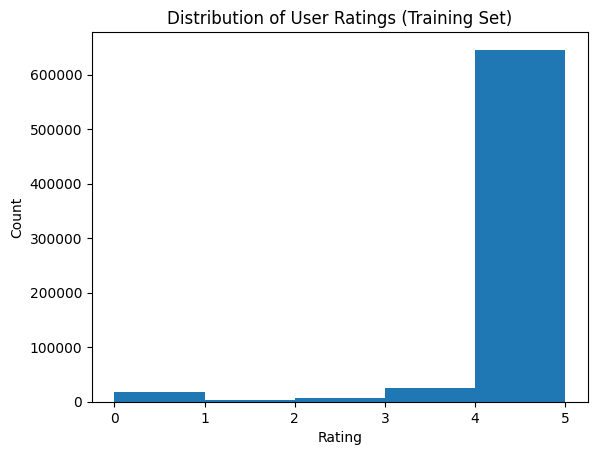

In [247]:
plt.hist(interactions_train['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of User Ratings (Training Set)')
plt.show();

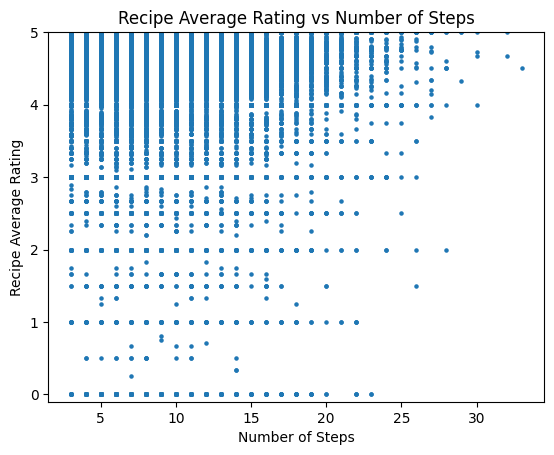

In [248]:
steps_per_recipe = recipes_interactions_merged.groupby('recipe_id')['n_steps'].first()

plt.scatter(steps_per_recipe, avg_ratings_per_recipe, s=5)
plt.xlabel('Number of Steps')
plt.ylabel('Recipe Average Rating')
plt.ylim(-0.1,5)
plt.title('Recipe Average Rating vs Number of Steps')
plt.show()

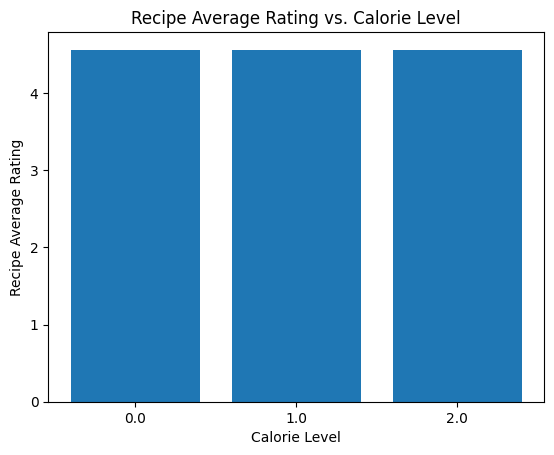

In [249]:
calorie_level_per_recipe = recipes_interactions_merged.groupby('calorie_level')['rating'].mean()

plt.bar(x=calorie_level_per_recipe.index.astype(str), height=calorie_level_per_recipe)
plt.xlabel('Calorie Level')
plt.ylabel('Recipe Average Rating')
plt.title('Recipe Average Rating vs. Calorie Level');

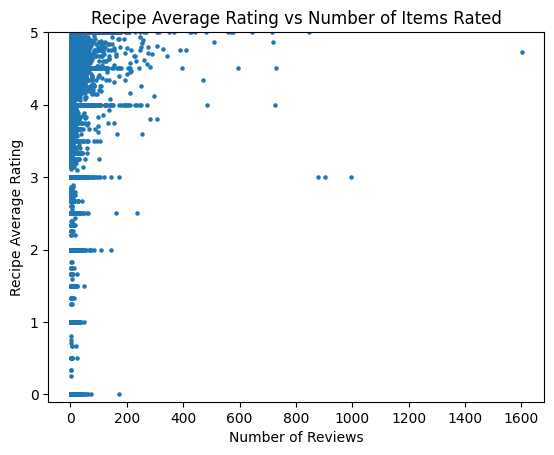

In [250]:
reviews_per_recipe = recipes_interactions_merged.groupby('recipe_id')['n_reviewers'].first()

plt.scatter(reviews_per_recipe, avg_ratings_per_recipe, s=5)
plt.xlabel('Number of Reviews')
plt.ylabel('Recipe Average Rating')
plt.ylim(-0.1,5)
plt.title('Recipe Average Rating vs Number of Items Rated');

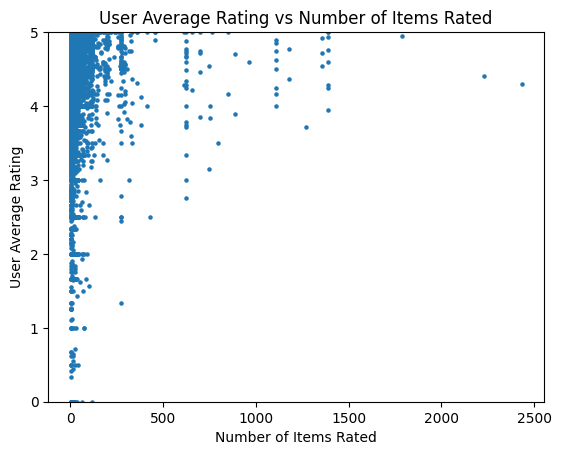

In [251]:
items_per_user = users_interactions_merged.groupby('user_id')['n_items'].first()

plt.scatter(items_per_user, avg_ratings_per_user, s=5)
plt.xlabel('Number of Items Rated')
plt.ylabel('User Average Rating')
plt.ylim(0,5)
plt.title('User Average Rating vs Number of Items Rated');

In [252]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom > 0:
        return numer/denom
    return 0

def MSE(predictions, y):
    diffs = [(a-b)**2 for (a,b) in zip(predictions, y)]
    return sum(diffs)/len(diffs)

def euclidean_distance(arr1, arr2):
    return np.sqrt(sum((arr1 - arr2)**2))

def normalize(arr):
    min = np.min(arr)
    max = np.max(arr)

    return (arr - min) / (max - min)

In [253]:
train_X = interactions_train.drop(columns=['rating'])
train_y = interactions_train['rating']
validation_X = interactions_validation.drop(columns=['rating'])
validation_y = interactions_validation['rating']
test_X = interactions_test.drop(columns=['rating'])
test_y = interactions_test['rating']

In [254]:
PP_recipes

,id,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,n_reviewers,n_steps
i,,,,,,,,,
0,40893,"[40480, 1454, 16201, 2056, 955, 541, 11332, 82...","[[1424, 8876, 11007], [3484, 21453], [38966, 2...","[40480, 40482, 23667, 11007, 240, 21453, 240, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0,"[3384, 7979, 2127, 3502, 3217, 1257, 2778, 500...",2,4
1,44394,"[40480, 34712, 22683, 11274, 5409, 29868, 40481]","[[5343, 535, 2044, 5409, 7087], [17869, 6020],...","[40480, 40482, 12172, 1281, 5409, 7087, 240, 6...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[912, 7557, 2499, 5382]",1,5
2,85009,"[40480, 12187, 13995, 571, 14719, 40481]","[[1061, 494, 813, 2141], [31843], [30645, 4785...","[40480, 40482, 2572, 19472, 31757, 512, 823, 4...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",2,"[4623, 6265, 1168, 6016, 3597, 3440, 7213, 169...",2,3
3,134728,"[40480, 27, 12, 263, 4017, 1494, 273, 14122, 4...","[[5867, 34056], [17918], [15022, 8361], [6953]...","[40480, 40482, 7087, 17918, 240, 6953, 488, 11...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[1304, 2683, 3217, 6270, 3532, 869, 7557, 3698...",7,10
4,200236,"[40480, 16212, 11880, 556, 19811, 12772, 22075...","[[16212, 1535], [6953], [1430, 1301, 11332], [...","[40480, 40482, 2525, 10906, 485, 29848, 40478,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",2,"[4130, 6270, 3486, 7557, 5010, 3203, 2683, 125...",4,14
...,...,...,...,...,...,...,...,...,...
178260,50804,"[40480, 5867, 3586, 17532, 14349, 29139, 40481]","[[589, 260, 4001, 17918], [6953], [15473, 1016...","[40480, 40482, 5867, 271, 715, 11868, 2525, 48...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[63, 6270, 335, 332, 4717, 2499, 6676, 4987, 6...",1,11
178261,492861,"[40480, 554, 13641, 2169, 40481]","[[1353], [2169], [1430, 857, 643, 1631], [1657...","[40480, 40482, 6927, 481, 11007, 271, 14259, 4...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7655, 1625, 3489, 7821]",2,13
178262,249924,"[40480, 7482, 8533, 9, 263, 1494, 273, 5867, 1...","[[1657, 5867], [24329, 26285], [6945, 978, 113...","[40480, 40482, 587, 616, 246, 850, 522, 867, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",2,"[7819, 1504, 1986, 3732, 7714]",5,9


In [255]:
PP_users

,techniques,items,n_items,ratings,n_ratings
u,,,,,
0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...
25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2


In [256]:
# Baseline 1: Always Predict Global Average

global_average = interactions_train['rating'].mean()
print('Mean Squared Error for Baseline 1 (Always Predict Global Average):', MSE([global_average] * test_y.shape[0], test_y))

# Baseline 2: Regresssion With Two Predictors

baseline_train_X_features = [[PP_recipes.iloc[i]['calorie_level'], PP_users.iloc[u]['n_items']] for u, i in train_X[['u', 'i']].to_numpy()]
baseline_test_X_features = [[PP_recipes.iloc[i]['calorie_level'], PP_users.iloc[u]['n_items']] for u, i in test_X[['u', 'i']].to_numpy()]

baseline_model = sklearn.linear_model.LinearRegression()
baseline_model.fit(baseline_train_X_features, train_y)
baseline_model_preds = baseline_model.predict(baseline_test_X_features)
print('Mean Squared Error for Baseline 2 (Regrission With Two Predictors):', MSE(baseline_model_preds, test_y))

Mean Squared Error for Baseline 1 (Always Predict Global Average): 1.921769558034767
Mean Squared Error for Baseline 2 (Regrission With Two Predictors): 1.889391224000372


In [ ]:
N_recipes = len(PP_recipes)

ingredient_df = Counter()
for ing_list in PP_recipes['ingredient_ids']:
    ingredient_df.update(set(ing_list))  

ingredient_idf = {
    k: math.log(N_recipes / (1 + ingredient_df[k]))
    for k in ingredient_df
}

steps_df = Counter()
for step_list in PP_recipes['steps_tokens']:
    steps_df.update(set(step_list))

steps_idf = {
    k: math.log(N_recipes / (1 + steps_df[k]))
    for k in steps_df
}

def weighted_jaccard(A, B, idf):
    A = set(A)
    B = set(B)

    union = A | B
    if not union:
        return 0.0

    inter = A & B

    w_inter = sum(idf.get(x, 0.0) for x in inter)
    w_union = sum(idf.get(x, 0.0) for x in union)

    if w_union == 0:
        return 0.0

    return w_inter / w_union

def get_familiarity(datum, col, idf):
    user = datum['u']
    recipe = datum['i']

    recipe_set = PP_recipes.iloc[recipe][col]

    user_items = PP_users.iloc[user]['items']
    sims = []

    for i in user_items:
        known_set = PP_recipes.iloc[i][col]
        sims.append(weighted_jaccard(recipe_set, known_set, idf))

    if len(sims) == 0:
        return 0.0
    
    return np.mean(sims)


In [ ]:
def feature(datum):
    user = datum.u
    recipe = datum.i

    user_num_reviews = np.log1p(PP_users.loc[user]['n_ratings'])

    recipe_num_reviewers = np.log1p(PP_recipes.loc[recipe]['n_reviewers'])

    recipe_num_steps = np.log1p(PP_recipes.loc[recipe]['n_steps'])

    recipe_calorie_level = PP_recipes.loc[recipe]['calorie_level']

    ingredient_familiarity = get_familiarity(datum, 'ingredient_ids', ingredient_idf)

    steps_familiarity = get_familiarity(datum, 'steps_tokens', steps_idf)

    recipe_techniques = np.array(PP_recipes.loc[recipe]['techniques'])
    user_techniques = np.array(PP_users.loc[user]['techniques'])

    if recipe_techniques.sum() == 0:
        technique_familiarity = 0.0
    else:
        technique_familiarity = (user_techniques * recipe_techniques).sum() / recipe_techniques.sum()

    return [user_num_reviews, recipe_num_reviewers, recipe_calorie_level, recipe_num_steps, \
            ingredient_familiarity,steps_familiarity, technique_familiarity]



In [ ]:
interactions_train_50k = interactions_train[:50000]
X_train = [feature(d) for i, d in interactions_train_50k.iterrows()]
X_train[:5]

[[1.6094379124341003,
  3.713572066704308,
  1,
  1.9459101490553132,
  0.26292523421083425,
  0.2770827853893283,
  1.0],
 [1.6094379124341003,
  1.9459101490553132,
  1,
  2.772588722239781,
  0.2771012589484246,
  0.2995788322314385,
  2.0],
 [1.0986122886681098,
  3.7376696182833684,
  2,
  2.995732273553991,
  0.5064184108490258,
  0.5265036833414574,
  1.0],
 [1.0986122886681098,
  2.772588722239781,
  0,
  2.9444389791664403,
  0.5064184108490258,
  0.5265036833414574,
  1.0],
 [1.6094379124341003,
  2.1972245773362196,
  2,
  2.5649493574615367,
  0.2639058618385838,
  0.2940745227635075,
  1.75],
 [1.6094379124341003,
  5.003946305945459,
  0,
  2.0794415416798357,
  0.2604549567824666,
  0.2779585690029427,
  1.6666666666666667],
 [5.0369526024136295,
  2.5649493574615367,
  1,
  2.5649493574615367,
  0.029007524096821353,
  0.05738060877041198,
  13.5],
 [5.0369526024136295,
  1.0986122886681098,
  0,
  2.1972245773362196,
  0.0286138313087633,
  0.051926472288058106,
  57.0

In [ ]:
X_train = np.array(X_train)
X_train.shape

for i in range(X_train.shape[1]):
    X_train[:, i] = normalize(X_train[:, i])

X_train[:5]

array([[6.96775629e-02, 4.51259350e-01, 5.00000000e-01, ...,
        4.15948380e-01, 4.52414550e-01, 6.42673522e-04],
       [6.96775629e-02, 1.87166052e-01, 5.00000000e-01, ...,
        4.38435767e-01, 4.90454351e-01, 1.28534704e-03],
       [0.00000000e+00, 4.54859587e-01, 1.00000000e+00, ...,
        8.02200902e-01, 8.74174047e-01, 6.42673522e-04],
       ...,
       [3.89104220e-01, 3.99524778e-01, 5.00000000e-01, ...,
        8.03045415e-02, 9.95441484e-02, 6.42673522e-03],
       [6.02738058e-01, 1.36896223e-01, 5.00000000e-01, ...,
        3.44849702e-02, 7.27195652e-02, 3.59897172e-02],
       [5.15133206e-01, 1.36896223e-01, 0.00000000e+00, ...,
        1.17272094e-01, 9.71322440e-02, 2.93487575e-02]])

In [ ]:
y_train = interactions_train['rating'][:50000]
y_train[:5]

In [ ]:
X_test = [feature(d) for i, d in interactions_test.iterrows()]
X_test[:5]

[[3.332204510175204,
  1.0986122886681098,
  0,
  2.302585092994046,
  0.021001262706796267,
  0.034500766353063574,
  8.666666666666666],
 [5.056245805348308,
  0.6931471805599453,
  0,
  2.1972245773362196,
  0.015398726484659234,
  0.04433298549245082,
  28.333333333333332],
 [1.0986122886681098,
  0.6931471805599453,
  1,
  2.70805020110221,
  0.026302124652374137,
  0.04834038078080562,
  0.5],
 [1.3862943611198906,
  0.6931471805599453,
  1,
  2.0794415416798357,
  0.041241947840962516,
  0.06425638160125535,
  0.8],
 [5.41610040220442,
  0.6931471805599453,
  2,
  2.4849066497880004,
  0.019364860258741116,
  0.05287733723769631,
  27.0],
 [7.426549072397305,
  0.6931471805599453,
  0,
  2.3978952727983707,
  0.010927977796625585,
  0.05884926092556237,
  240.0],
 [5.003946305945459,
  0.6931471805599453,
  0,
  1.9459101490553132,
  0.026019566614721545,
  0.04964404812066115,
  25.0],
 [5.831882477283517,
  0.6931471805599453,
  0,
  1.6094379124341003,
  0.013573560308077381,

In [ ]:
X_test = np.array(X_test)
for i in range(X_test.shape[1]):
    X_test[:, i] = normalize(X_test[:, i])

X_test[:5]

array([[0.32573122, 0.09010717, 0.        , ..., 0.0476035 , 0.08298855,
        0.01736807],
       [0.57715315, 0.        , 0.        , ..., 0.03490425, 0.10777523,
        0.05678023],
       [0.        , 0.        , 0.5       , ..., 0.05961895, 0.11787773,
        0.001002  ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.14759168,
        0.00167001],
       [0.        , 0.        , 0.5       , ..., 0.05297919, 0.31222076,
        0.00160321],
       [0.        , 0.        , 0.        , ..., 0.0708851 , 0.08659519,
        0.        ]])

In [ ]:
mod = sklearn.linear_model.Ridge()
mod.fit(X_train, y_train)
preds = mod.predict(X_train)
MSE(preds, y_train)

1.8057912505539755